In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
csv_file = "T1.csv"
df = pd.read_csv(csv_file)

In [5]:
#get the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [6]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [7]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [8]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')

# Extract month and hour
df['Month'] = df['Date/Time'].dt.month
df['Hour'] = df['Date/Time'].dt.hour

# Display the resulting DataFrame
df[['Date/Time', 'Month', 'Hour']]

,Date/Time,Month,Hour
0,2018-01-01 00:00:00,1,0
1,2018-01-01 00:10:00,1,0
2,2018-01-01 00:20:00,1,0
3,2018-01-01 00:30:00,1,0
4,2018-01-01 00:40:00,1,0
...,...,...,...
50525,2018-12-31 23:10:00,12,23
50526,2018-12-31 23:20:00,12,23
50527,2018-12-31 23:30:00,12,23
50528,2018-12-31 23:40:00,12,23


In [9]:
# get a sample from the data
sample_df = df.sample(frac=0.1, random_state=24)

In [10]:
columns = ['Wind Speed (m/s)', 'Wind Direction (°)', 'Month', 'Hour', 'Theoretical_Power_Curve (KWh)', 'LV ActivePower (kW)']

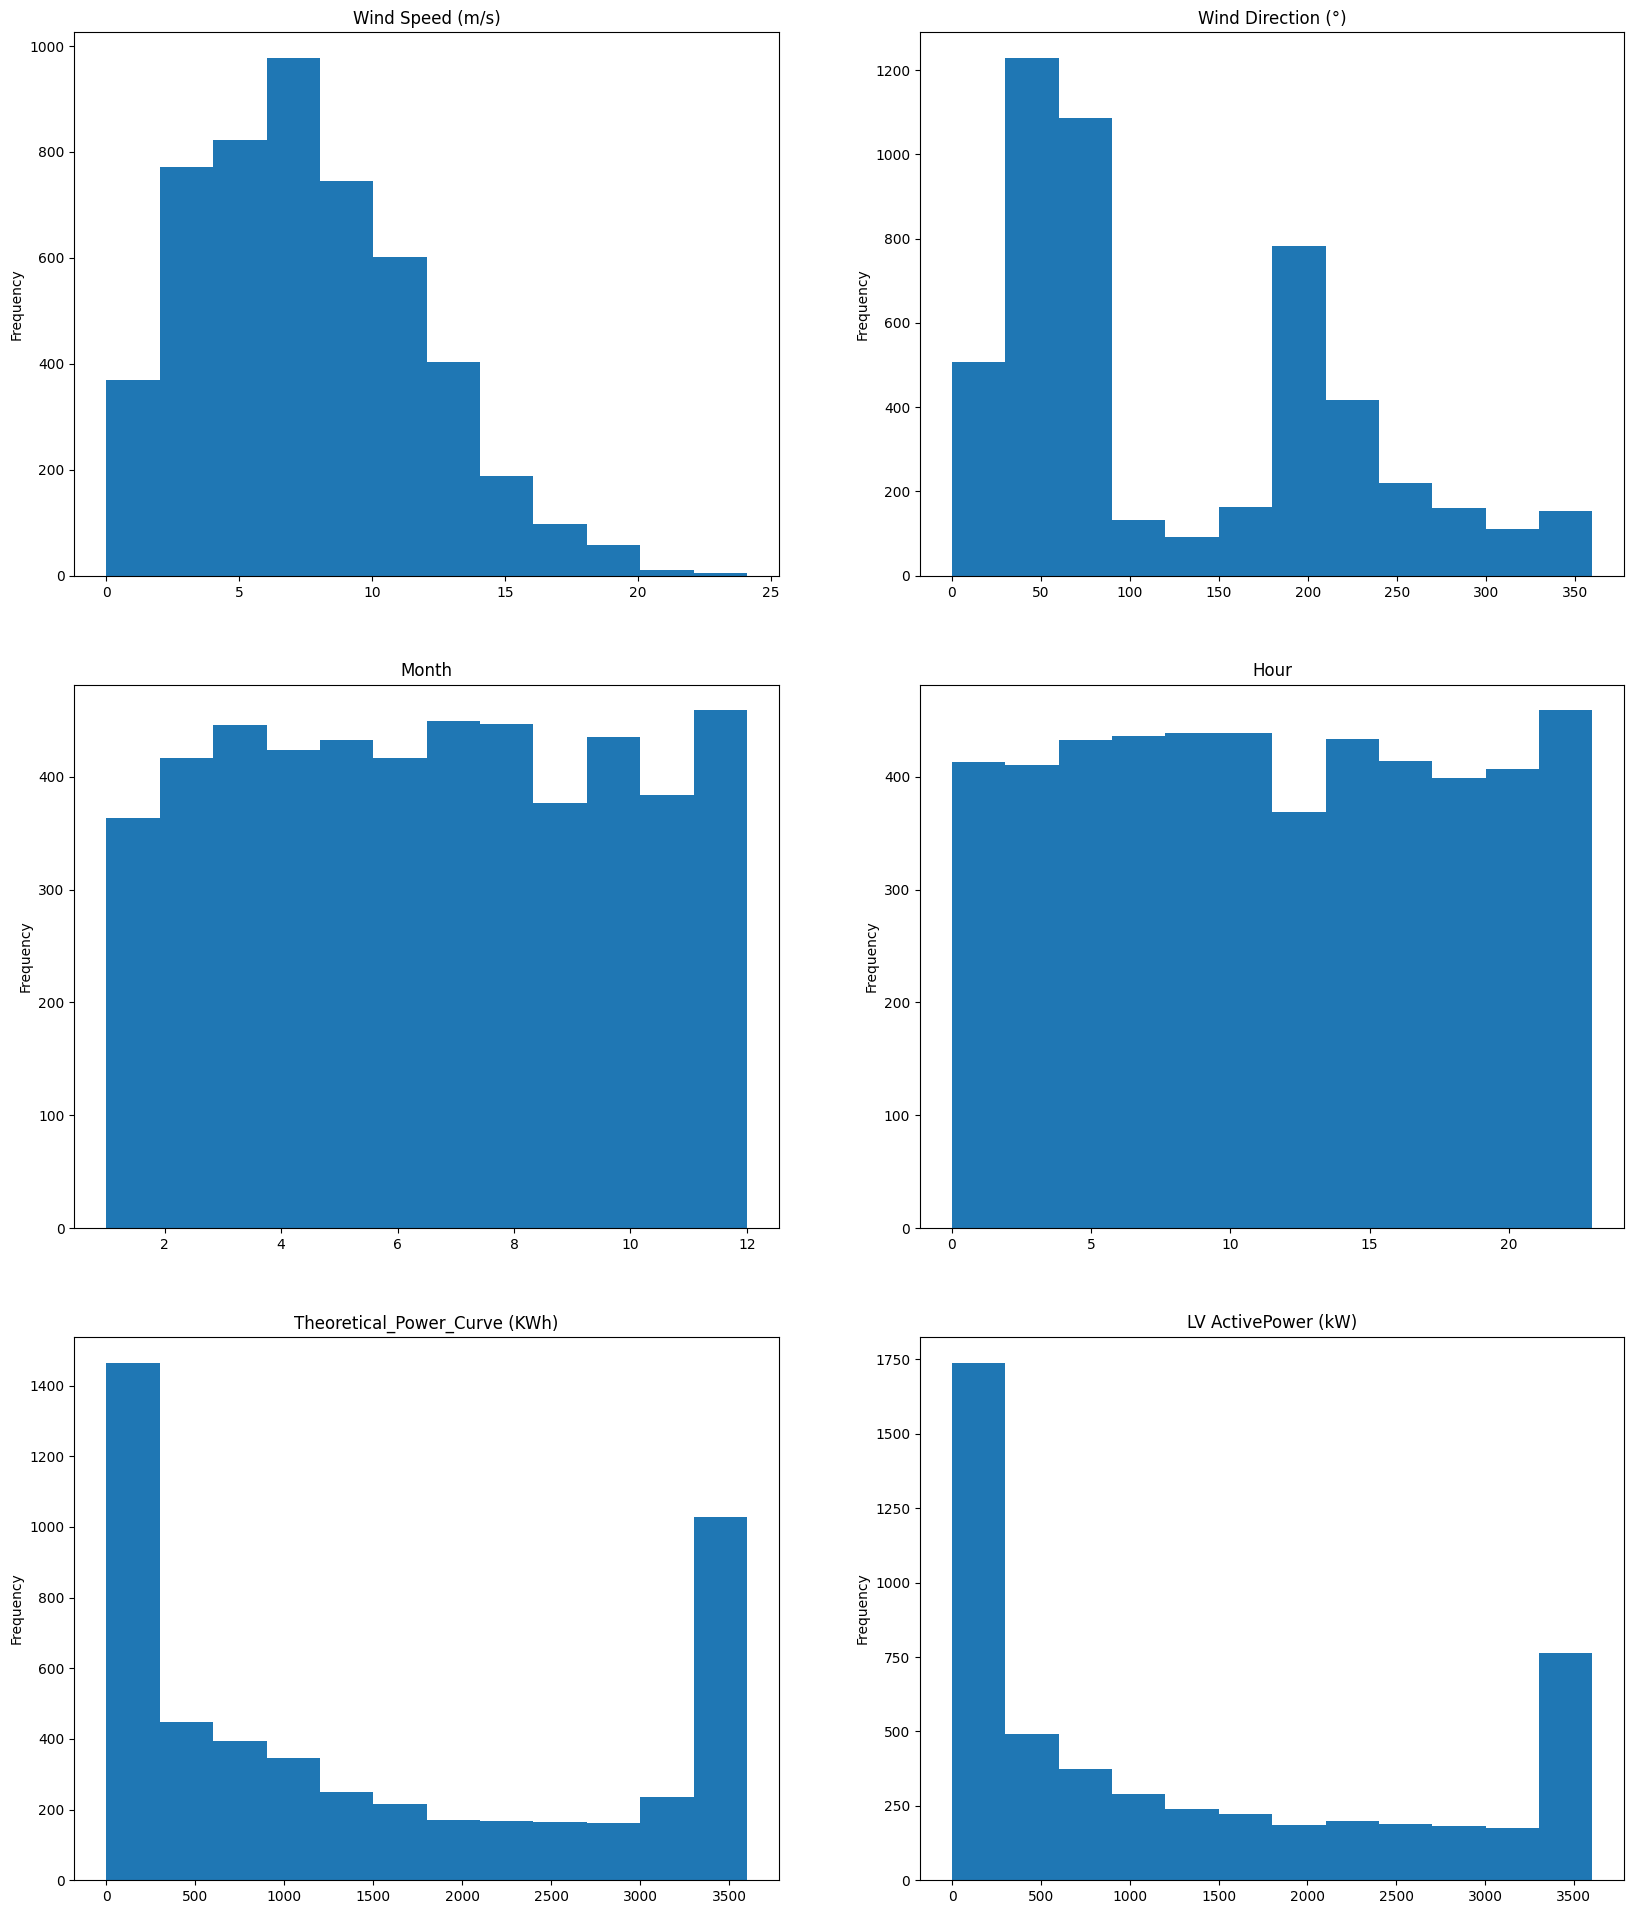

In [11]:
i = 1
plt.figure(figsize=(20,24))
for column in columns:
    plt.subplot(3,2,i)
    sample_df[column].plot.hist(bins=12)
    plt.title(column)
    i += 1
    

In [12]:
# Group by the hour and calculate the average of 'LV ActivePower (kW)'
hourly = df.groupby('Hour')['LV ActivePower (kW)'].mean().reset_index()

# Sort the results by the average power production
hourly = hourly.sort_values(by='LV ActivePower (kW)').reset_index(drop=True)
hourly

,Hour,LV ActivePower (kW)
0,10,1056.424411
1,9,1066.081309
2,11,1066.081574
3,12,1077.400584
4,8,1091.950881
5,13,1157.791665
6,7,1178.739047
7,14,1242.675353
8,6,1243.540404
9,5,1323.467826


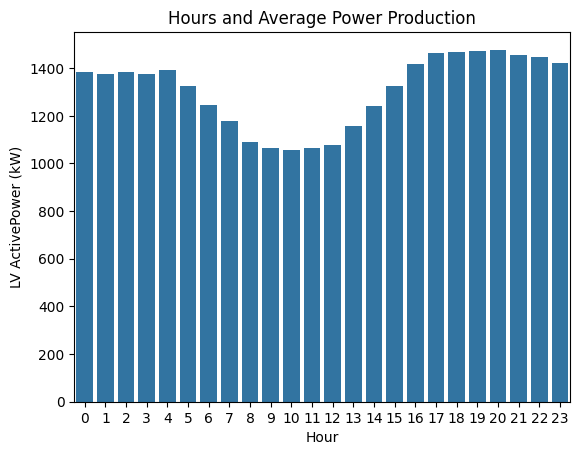

In [13]:
sns.barplot(x='Hour', y='LV ActivePower (kW)', data=hourly)
plt.title('Hours and Average Power Production');

,Wind Speed (m/s),Wind Direction (°),Month,Hour,Theoretical_Power_Curve (KWh),LV ActivePower (kW)
Wind Speed (m/s),1.000000,-0.090748,-0.014343,0.029400,0.946570,0.908730
Wind Direction (°),-0.090748,1.000000,-0.174113,-0.009648,-0.106845,-0.075954
Month,-0.014343,-0.174113,1.000000,0.002852,-0.001446,0.030412
Hour,0.029400,-0.009648,0.002852,1.000000,0.038504,0.037762
Theoretical_Power_Curve (KWh),0.946570,-0.106845,-0.001446,0.038504,1.000000,0.943511
LV ActivePower (kW),0.908730,-0.075954,0.030412,0.037762,0.943511,1.000000


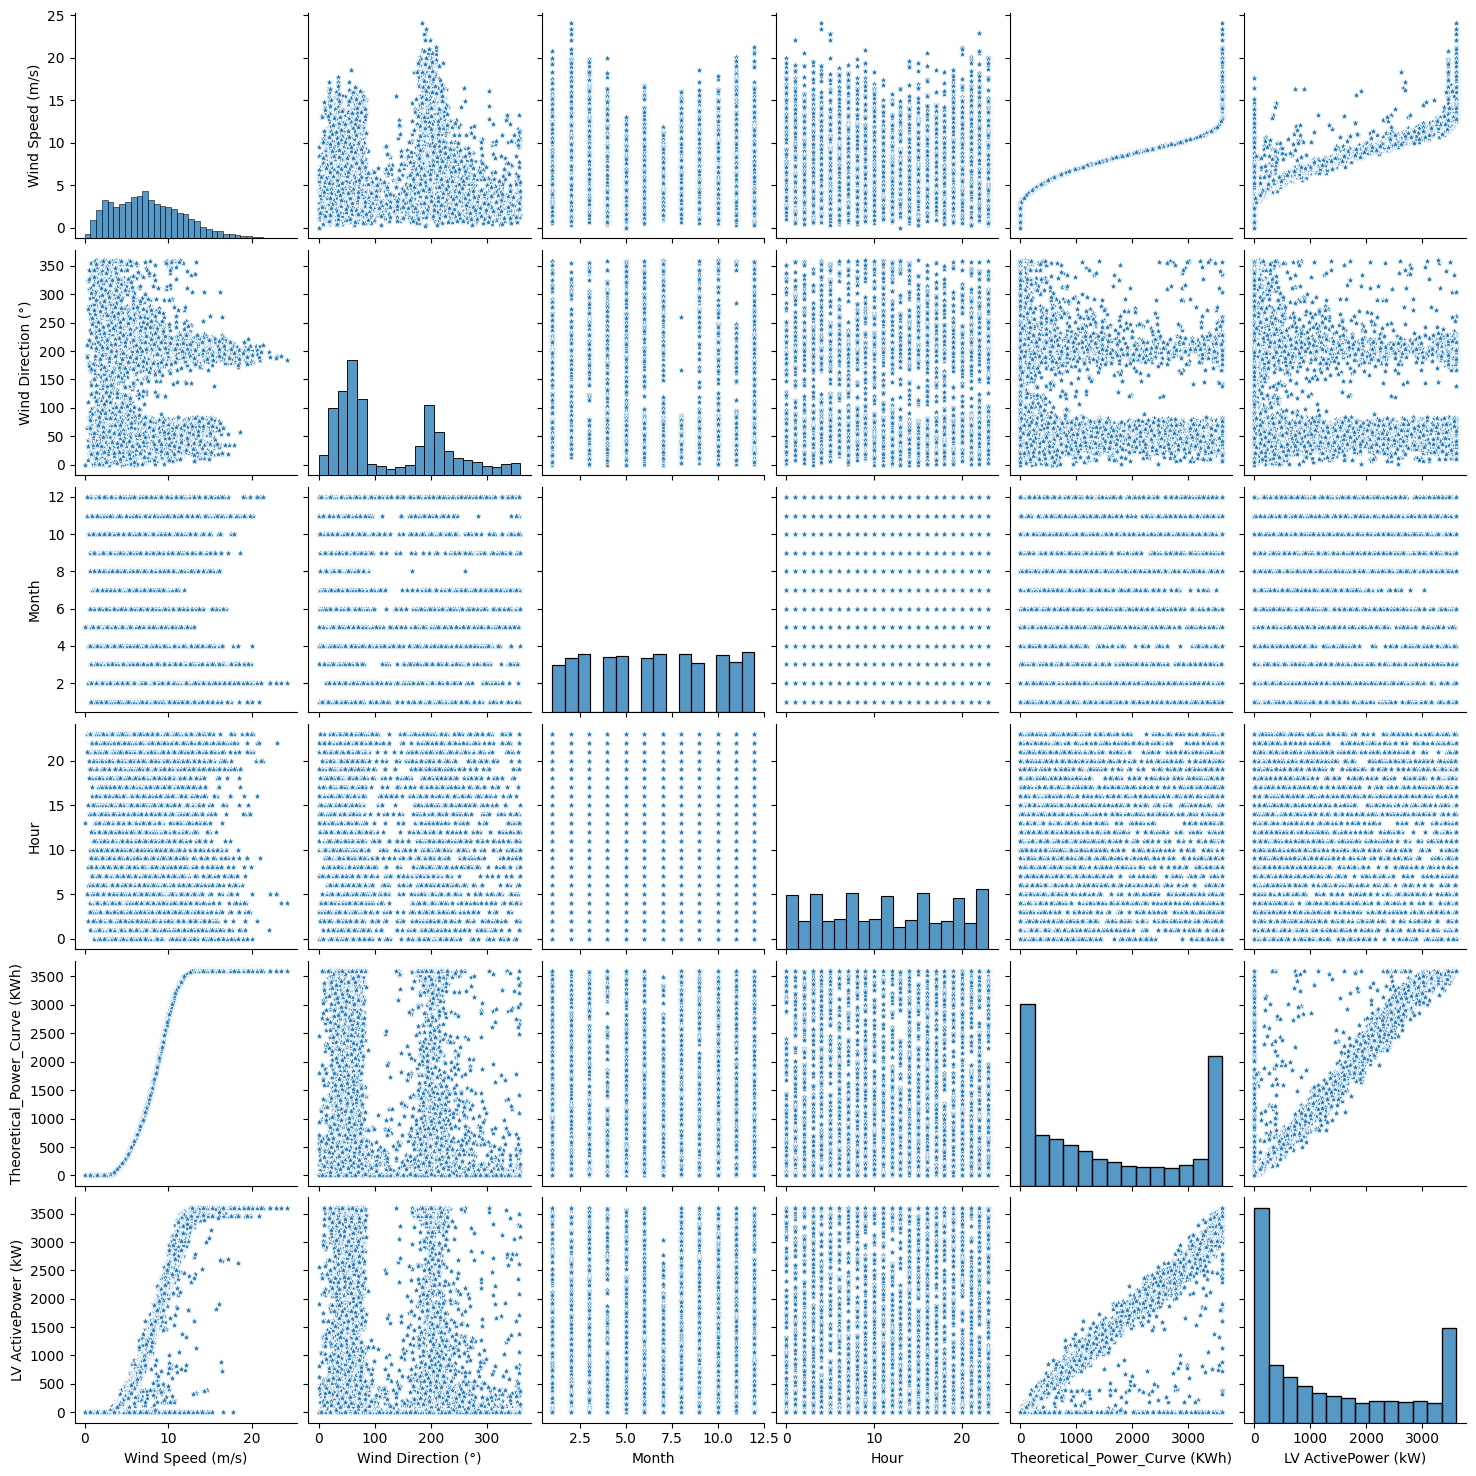

In [14]:
display(sample_df[columns].corr())
sns.pairplot(sample_df[columns], markers='*');

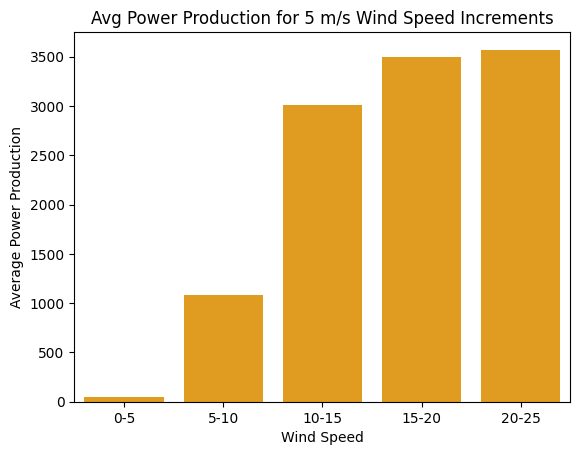

In [15]:
# Finding average power production for 5 m/s wind speed increments
wind_speed = []
avg_power = []
for i in [0, 5, 10, 15, 20]:
    avg_value = df[(df['Wind Speed (m/s)'] > i) & (df['Wind Speed (m/s)'] <= i + 5)]['LV ActivePower (kW)'].mean()
    avg_power.append(avg_value)
    wind_speed.append(f"{i}-{i+5}")

sns.barplot(x=wind_speed, y=avg_power, color='orange')
plt.title('Avg Power Production for 5 m/s Wind Speed Increments')
plt.xlabel('Wind Speed')
plt.ylabel('Average Power Production');

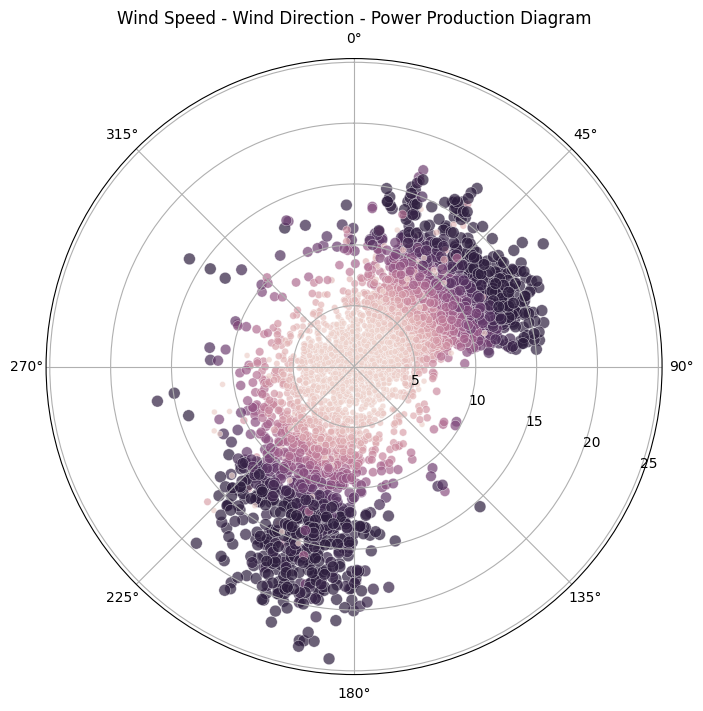

In [16]:
# Creating the polar diagram
from math import radians

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
# Inside circles are the wind speed and marker color and size represents the amount of power production
sns.scatterplot(x=[radians(x) for x in sample_df['Wind Direction (°)']], 
                y=sample_df['Wind Speed (m/s)'],
                size=sample_df['LV ActivePower (kW)'],
                hue=sample_df['LV ActivePower (kW)'],
                alpha=0.7, legend=None)
# Setting the polar diagram's top represents the North 
ax.set_theta_zero_location('N')
# Setting -1 to start the wind direction clockwise
ax.set_theta_direction(-1)
# Setting wind speed labels in a better position
ax.set_rlabel_position(110)
plt.title('Wind Speed - Wind Direction - Power Production Diagram')
plt.ylabel(None);

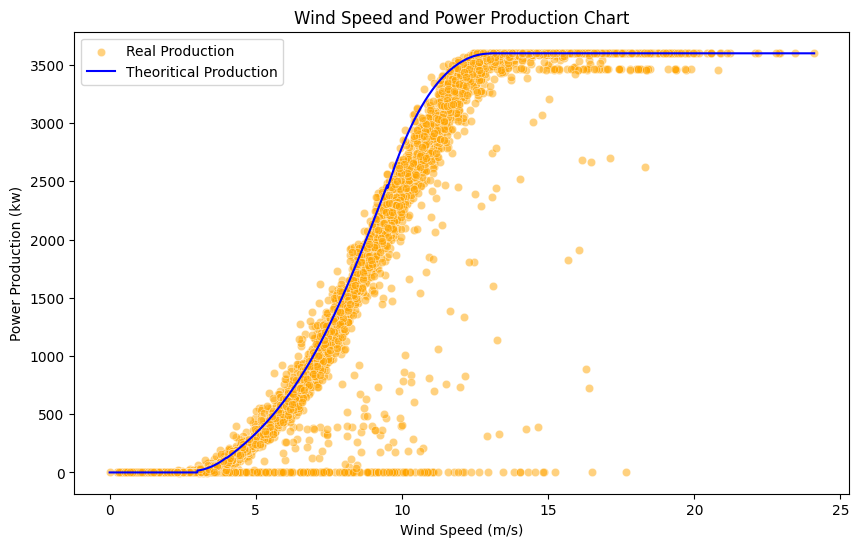

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Wind Speed (m/s)', y='LV ActivePower (kW)', color='orange', label='Real Production', alpha=0.5, data=sample_df)
sns.lineplot(x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)', color='blue', label='Theoritical Production', data=sample_df)
plt.title('Wind Speed and Power Production Chart')
plt.ylabel('Power Production (kw)');

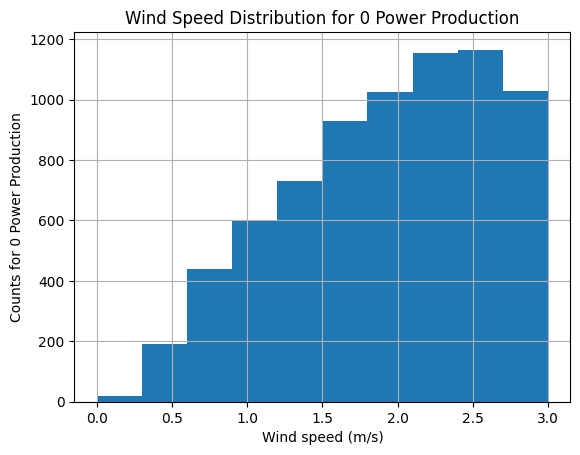

In [18]:
# Filter the big data where the real and theoritical power productions are equal to 0
zero_theo_power = df[(df['LV ActivePower (kW)'] == 0) & (df['Theoretical_Power_Curve (KWh)'] == 0)]

zero_theo_power[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'LV ActivePower (kW)']].sample(5)

# Let's see the wind speed distribution for 0 power production
zero_theo_power['Wind Speed (m/s)'].hist()
plt.title('Wind Speed Distribution for 0 Power Production')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Counts for 0 Power Production');

In [19]:
zero_power = df[(df['LV ActivePower (kW)'] == 0) & (df['Theoretical_Power_Curve (KWh)'] != 0) & (df['Wind Speed (m/s)'] > 3)]
zero_power.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,Hour
382,2018-01-03 15:40:00,0.0,3.743307,83.986265,245.068207,1,15
388,2018-01-03 16:40:00,0.0,3.034003,17.180593,221.086502,1,16
389,2018-01-03 16:50:00,0.0,3.197354,25.431221,232.679596,1,16
390,2018-01-03 17:00:00,0.0,3.907811,110.979604,241.973099,1,17
498,2018-01-04 13:50:00,0.0,3.441704,45.742725,79.094109,1,13


In [20]:
'No of Observations (while Wind Speed > 3 m/s and Power Production = 0): ', len(zero_power)

('No of Observations (while Wind Speed > 3 m/s and Power Production = 0): ',
 3497)

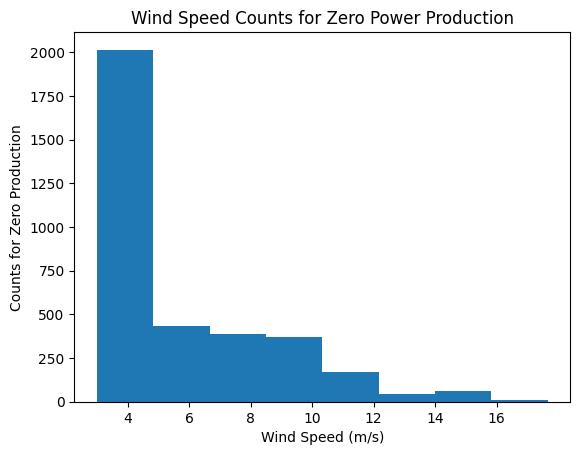

In [21]:
zero_power['Wind Speed (m/s)'].plot.hist(bins=8)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Counts for Zero Production')
plt.title('Wind Speed Counts for Zero Power Production')
plt.xticks(ticks=np.arange(4,18,2));

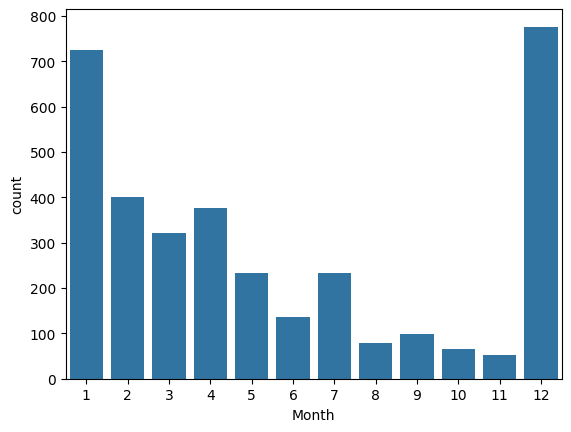

In [22]:
sns.countplot(zero_power,x='Month');

In [23]:
filtered_df = df[~((df['LV ActivePower (kW)'] == 0) & (df['Theoretical_Power_Curve (KWh)'] != 0) & (df['Wind Speed (m/s)'] > 3))]

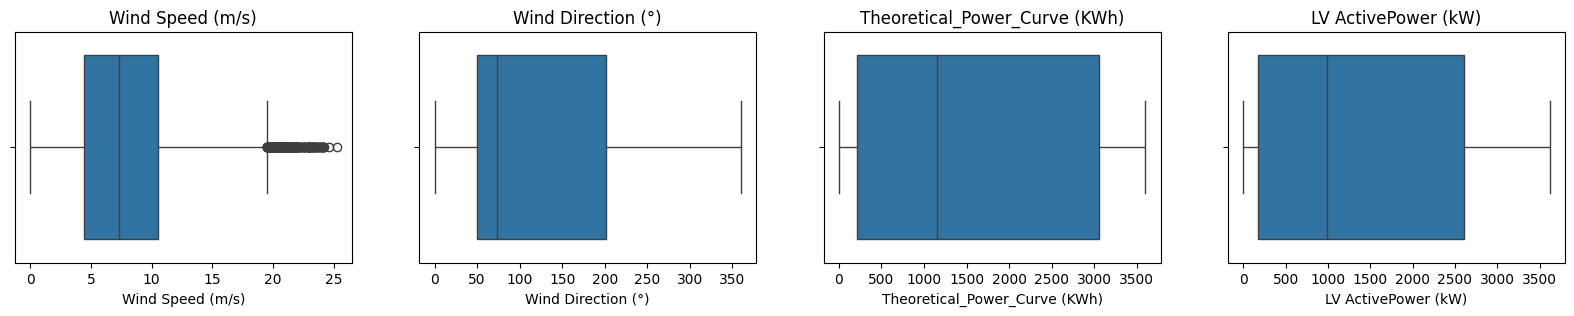

In [24]:
columns = ['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)', 'LV ActivePower (kW)']
i=1
plt.figure(figsize=(20,3))
for column in columns:
    df = filtered_df[column]
    plt.subplot(1,4,i)
    sns.boxplot(x=df)
    plt.title(column)
    i += 1

In [25]:
# Create a pandas df for visualization
wind_speed = filtered_df['Wind Speed (m/s)']

# Defining the quantiles and interquantile range
Q1 = wind_speed.quantile(0.25)
Q3 = wind_speed.quantile(0.75)
IQR = Q3-Q1
# Defining the lower and upper threshold values
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('Quantile (0.25): ', Q1, '  Quantile (0.75): ', Q3)
print('Lower threshold: ', lower, ' Upper threshold: ', upper)

Quantile (0.25):  4.45584678649902   Quantile (0.75):  10.4771900177001
Lower threshold:  -4.576168060302599  Upper threshold:  19.50920486450172


In [26]:
# Indexing for outliers
outlier_tf = (wind_speed < lower) | (wind_speed > upper)

print('Total Number of Outliers: ', len(wind_speed[outlier_tf]))
print('--'*15)
print('Some Examples of Outliers:')
print(wind_speed[outlier_tf].sample(10))

Total Number of Outliers:  407
------------------------------
Some Examples of Outliers:
12325    20.998619
4090     19.792311
45468    20.101049
10296    19.921490
8730     20.548849
10619    21.485081
10268    20.786770
10277    20.067829
8718     19.992630
4283     22.511120
Name: Wind Speed (m/s), dtype: float64


In [27]:
new_df = filtered_df[filtered_df['Wind Speed (m/s)'] >= 19]

mean_active_power = new_df['LV ActivePower (kW)'].mean()
mean_active_power

np.float64(3566.4634427974684)

In [28]:
# Modify the 'wind speed (m/s)' column based on the condition
filtered_df['Wind Speed (m/s)'] = filtered_df['Wind Speed (m/s)'].apply(lambda x: 19 if x > 19.447 else x)

# Count the number of rows in the DataFrame
row_count = len(filtered_df)

# Display the result
print("Number of rows:", row_count)

Number of rows: 47033


In [29]:
# High level power production
# Apply the filter based on the specified conditions
new_df = filtered_df[
    ((filtered_df['Month'] == 3) | (filtered_df['Month'] == 8) | (filtered_df['Month'] == 11)) &
    ((filtered_df['Hour'] >= 16) | (filtered_df['Hour'] <= 24)) &
    (((filtered_df['Wind Direction (°)'] > 0) | (filtered_df['Wind Direction (°)'] < 90)) &
     ((filtered_df['Wind Direction (°)'] > 180) | (filtered_df['Wind Direction (°)'] < 225)))]
# Calculate the mean of the 'lv activepower (kw)' column in the filtered DataFrame
mean_act_pow = new_df['LV ActivePower (kW)'].mean()

# Display the result
print("Mean Active Power (kW):", mean_act_pow)

Mean Active Power (kW): 2013.4446757880385


In [30]:
# Low level power production
low_df = filtered_df[
    (filtered_df['Month'] == 7) &
    ((filtered_df['Hour'] >= 9) | (filtered_df['Hour'] <= 11)) &
    (((filtered_df['Wind Direction (°)'] > 90) | (filtered_df['Wind Direction (°)'] < 160)))]
# Calculate the mean of the 'lv activepower (kw)' column in the filtered DataFrame
mean_act_pow = low_df['LV ActivePower (kW)'].mean()

# Display the result
print("Mean Active Power (kW):", mean_act_pow)

Mean Active Power (kW): 503.164420541487


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [51]:
#copy dataframe
final_df = filtered_df

In [54]:
# use standart scaler with continuous features
continuous_features = ['Wind Speed (m/s)', 'Wind Direction (°)', 'LV ActivePower (kW)']
scaler = StandardScaler()
final_df[continuous_features] = scaler.fit_transform(final_df[continuous_features])

In [55]:
# use sin and cos transformation for month and hour variables
final_df['month_sin'] = np.sin(2 * np.pi * final_df['Month'] / 12)
final_df['month_cos'] = np.cos(2 * np.pi * final_df['Month'] / 12)
final_df['hour_sin'] = np.sin(2 * np.pi * final_df['Hour'] / 24)
final_df['hour_cos'] = np.cos(2 * np.pi * final_df['Hour'] / 24)

In [ ]:
# drop unnecessary columns
final_df = final_df.drop(columns=['Month','Hour','Date/Time'])

In [61]:
final_df = final_df.drop(columns=['Theoretical_Power_Curve (KWh)'])

In [62]:
final_df.sample(n=10)

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°),label,month_sin,month_cos,hour_sin,hour_cos
747,-1.073113,-1.574652,0.428850,0.000000,5.000000e-01,0.866025,9.659258e-01,-0.258819
33750,0.905554,0.834518,-0.632777,2590.458984,-8.660254e-01,-0.500000,-7.071068e-01,0.707107
44163,-0.217658,-0.139179,-0.546268,1119.957031,-5.000000e-01,0.866025,-8.660254e-01,-0.500000
49084,0.102887,-0.001046,0.919173,1539.613037,-2.449294e-16,1.000000,-2.588190e-01,0.965926
44379,1.572645,2.457606,0.630887,3463.811035,-5.000000e-01,0.866025,8.660254e-01,0.500000
50107,-0.520060,-0.229555,0.936990,724.054016,-2.449294e-16,1.000000,2.588190e-01,0.965926
14594,-1.023383,-0.940484,0.380656,65.106773,8.660254e-01,-0.500000,-8.660254e-01,0.500000
7638,0.813928,0.495138,1.237575,2470.502930,8.660254e-01,0.500000,1.224647e-16,-1.000000
32452,1.208234,0.898332,-0.700778,2986.726074,-8.660254e-01,-0.500000,-8.660254e-01,0.500000
19681,-0.676897,-0.431325,-0.777846,518.723389,5.000000e-01,-0.866025,8.660254e-01,-0.500000


In [65]:
final_df.to_csv('processed_wind_turbine_data.csv', index=False)
print("Processed data is recorded successfully")

Processed data is recorded successfully


In [67]:
sample_df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,Hour,label
14491,2018-04-16 03:20:00,206.854004,4.310391,182.908077,96.692299,4,3,206.854004
9049,2018-03-09 08:00:00,0.000000,0.693998,0.000000,257.578003,3,8,0.000000
32106,2018-08-17 11:00:00,54.475979,3.424589,44.008905,29.158211,8,11,54.475979
44329,2018-11-18 19:40:00,2972.274902,11.073500,3297.779781,166.304596,11,19,2972.274902
16635,2018-05-01 03:00:00,112.238297,4.101102,142.001568,272.769104,5,3,112.238297


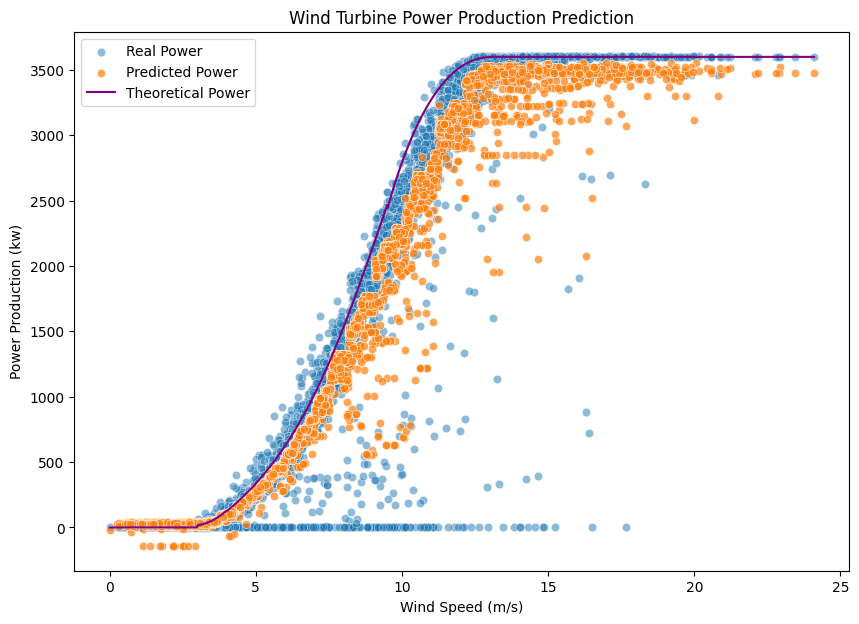

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# Converting lv activepower (kw) variable as label
sample_df['label'] = sample_df['LV ActivePower (kW)']

# Defining the variables to be used
variables = ['Month', 'Hour', 'Wind Speed (m/s)', 'Wind Direction (°)']
X = sample_df[variables]
y = sample_df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
gbm_model.fit(X_scaled, y)  # Fit the model if it isn't already trained

# Using ML model to predict
preds = gbm_model.predict(X_scaled)

# Creating DataFrame for predictions
preds_df = pd.DataFrame({'label': y, 'prediction': preds})

# Combining dataframes to compare
frames = [sample_df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)']], preds_df]
sample_data = pd.concat(frames, axis=1)

# Visualizing real, theoretical, and predicted power production
plt.figure(figsize=(10,7))
sns.scatterplot(x='Wind Speed (m/s)', y='label', alpha=0.5, label='Real Power', data=sample_data)
sns.scatterplot(x='Wind Speed (m/s)', y='prediction', alpha=0.7, label='Predicted Power', marker='o', data=sample_data)
sns.lineplot(x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)', label='Theoretical Power', color='purple', data=sample_data)
plt.title('Wind Turbine Power Production Prediction')
plt.ylabel('Power Production (kw)')
plt.legend()
plt.show()